In [8]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as plticker
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator #What do these do?
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import numpy as np
import sklearn

In [9]:
# Plot styling
#os.environ["PATH"] += os.pathsep + '/usr/bin' # To set latex= True?

#plt.style.use('plot_style.txt')
plt.style.use('/data/user/boiger_r/aerosol/aerosol_code1/postprocessing/PLOTS_PAPER/plot_style.txt')

# Textwidth of LaTeX file. Can be determined via \the\textwidth
textwidth = 483.69687

# Decide wether we want to save all figures
save_to_file = True

# Colors
cmap = cm.get_cmap('magma')

# Ticks
loc15 = plticker.MultipleLocator(base=15.0)
loc30 = plticker.MultipleLocator(base=30.0)

In [10]:
def set_size(textwidth, fraction=1, subplots=(1, 1), scale_factor=1, rescale_height=1):
    """Set figure dimensions to avoid scaling in LaTeX.
    
    Based largely on Jack Walton's post on ploting figures with matplotlib and LaTeX:
    https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    
    Input:
        textwidth: float or string
                Document width in points, or string of predined document type
        fraction: float, optional
                Fraction of the width which you wish the figure to occupy
        subplots: array-like, optional
                The number of rows and columns of subplots.
        scale_factor: Facto to scale width and height with
        rescale_height: Factor to rescale height
    Returns:
        fig_dim: tuple
                Dimensions of figure in inches
    """
    if textwidth == 'paper':
        # Textwidth of LaTeX file. Can be determined by typing
        # \the\textwidth
        # in your latex file and then compiling.
        width_pt = 483.69687
    elif textwidth == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = textwidth

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (scale_factor*fig_width_in, rescale_height*scale_factor*fig_height_in)

In [11]:
directory = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
directory1 = directory + 'paper_results_gaussian_bim_AAE/version1'
best_model_folder = '6607b_00023'
pred_datafile = directory1 +'/model/pred.hdf5'

In [12]:
plot_dir = directory1 + '/plots/hyperparameter_scans_paper'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
result_dir = directory1
model_dir = directory1 +'/model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [13]:

best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

In [14]:
best_model_hist.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

In [15]:
color = [cmap(0.8), cmap(0.2)]
color = ['tab:blue', 'tab:red']
#scat_style = {'s': 12, 'marker': 'P', 'alpha': 0.9, 'linewidths': 0.8}

train_marker = {'markerfacecolor': color[0], 'markeredgecolor': color[0], 'color': color[0],
                'markersize': 4, 'alpha': 1}
val_marker = {'markerfacecolor': color[1], 'markeredgecolor': color[1], 'color': color[1],
               'markersize': 3, 'alpha': 1}

In [17]:
sizel=8

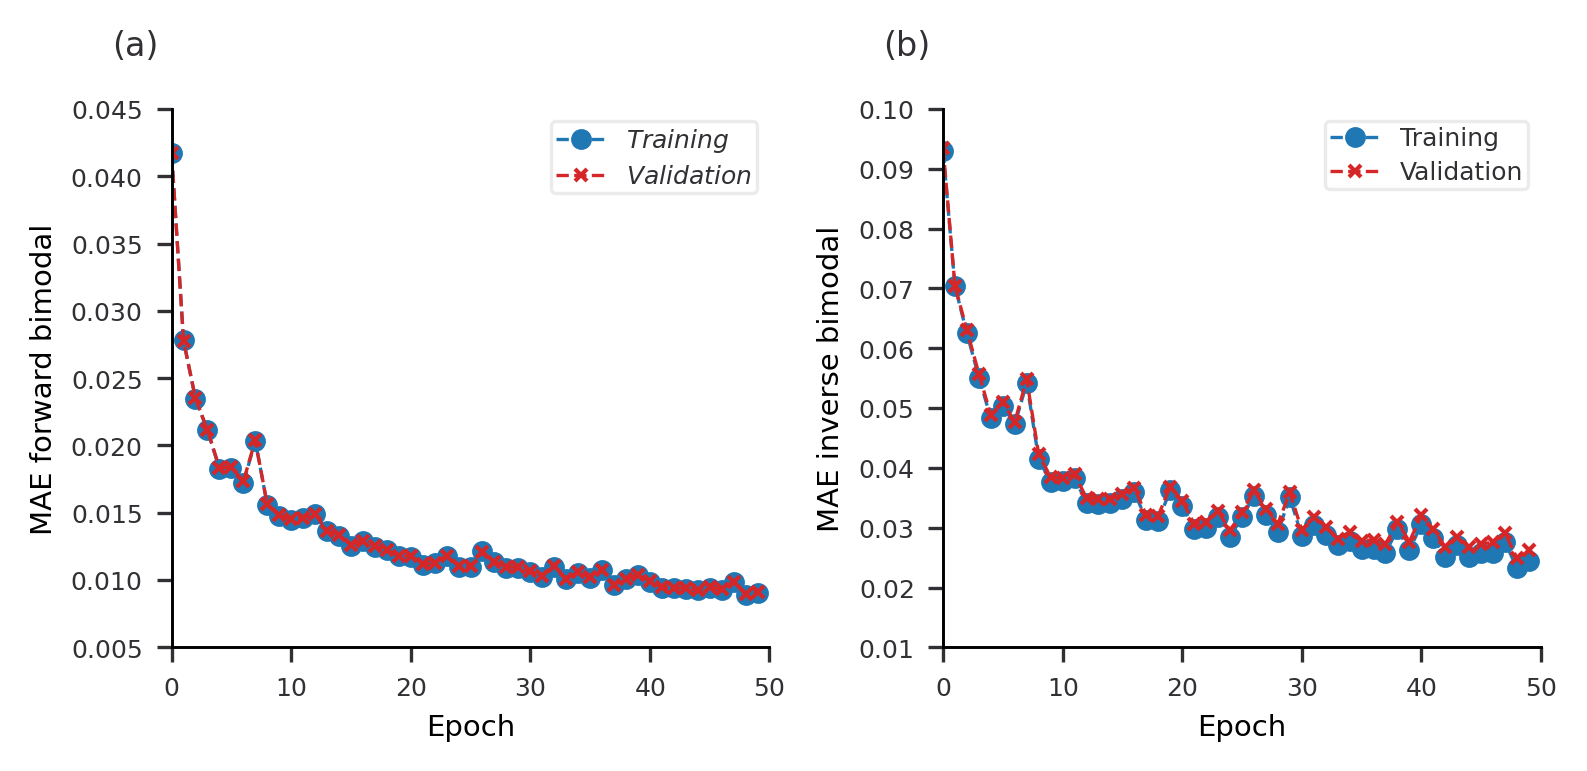

In [37]:
#figsize = set_size(textwidth, subplots=(1, 2), rescale_height=1.4)
epoch_limits = [0,50]
#fig, axs = plt.subplots(1, 2, figsize=(14,7))
fig = plt.figure(figsize=(5.3,2.6))
#ax = axs[0]
ax = fig.add_subplot(121)
ax.plot(best_model_hist['MAE_train'], 'o--', label = '$Training$', **train_marker)
ax.plot(best_model_hist['MAE_val'], 'x--', label =  '$Validation$', **val_marker)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.set_xlabel('Epoch')
ax.set_ylabel('MAE forward bimodal')
ax.set_xlim(epoch_limits)

#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax.legend( loc='upper right')
    #fig.suptitle("$\operatorname{Mean\ absolute\ errror}$")
ax2 = fig.add_subplot(122)
ax2.plot(best_model_hist['MAE_train_dvar'], 'o--', label = 'Training', **train_marker)
ax2.plot(best_model_hist['MAE_val_dvar'], 'x--', label =  'Validation', **val_marker)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MAE inverse bimodal')
ax2.set_xlim(epoch_limits)
#ax.set_title("$\operatorname{Forward\ process}$")

#ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
ax2.legend( loc='upper right')

ax.text(-0.1, 1.1,'(a)' , transform=ax.transAxes, size=sizel)
ax2.text(-0.1, 1.1,'(b)' , transform=ax2.transAxes, size=sizel)
fig.tight_layout()
fig.savefig(f'{plot_dir}/history_MAE_bim_labels.jpg')

In [11]:
plot_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_bim_AAE/version1/plots/hyperparameter_scans_paper'

In [20]:
configs = pd.read_csv(f'{model_dir}/configs.csv')
test_datafile = configs['config/datafile'][0]
test_datafile = test_datafile.replace('training','test')

In [21]:
dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
qoi_test = pd.read_hdf(test_datafile,key = 'qoi')
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

In [22]:
qoi_columns = qoi_test.columns
dvar_columns = dvar_test.columns

In [23]:
qoi_pred_fw = pd.read_hdf(pred_datafile, 'fw')
qoi_pred_fw = pd.DataFrame(data=qoi_pred_fw, columns=qoi_columns)
qoi_pred_fw

P11_0.450_0  P11_0.450_1  P11_0.450_2  P11_0.450_3  P11_0.450_4  \
0       -21.005031   -21.024305   -21.096831   -21.186954   -21.296033   
1       -19.978053   -19.975882   -20.000432   -20.076983   -20.136067   
2       -20.984666   -20.999156   -21.087161   -21.184035   -21.271417   
3       -19.646440   -19.653958   -19.786543   -19.942857   -20.111322   
4       -19.667476   -19.657575   -19.766433   -19.929851   -20.091034   
...            ...          ...          ...          ...          ...   
19995   -20.190681   -20.209239   -20.237632   -20.274965   -20.340604   
19996   -19.994102   -20.022506   -20.091498   -20.213730   -20.297809   
19997   -20.986814   -20.997812   -21.100979   -21.191710   -21.310917   
19998   -20.575295   -20.577102   -20.664015   -20.728877   -20.818611   
19999   -19.959982   -20.018357   -20.052381   -20.166201   -20.265935   

       P11_0.450_5  P11_0.450_6  P11_0.450_7  P11_0.450_8  P11_0.450_9  ...  \
0       -21.406812   -21.504187   -21.608497   -21.662907   -21.731689  ...   
1       -20.206437   -20.294430   -20.347863   -20.409183   -20.459995  ...   
2       -21.384122   -21.479947   -21.570665   -21.624408   -21.684165  ...   
3       -20.287179   -20.451800   -20.615371   -20.702024   -20.791505  ...   
4       -20.248593   -20.396766   -20.520474   -20.622508   -20.705193  ...   
...            ...          ...          ...          ...          ...  ...   
19995   -20.406974   -20.465348   -20.508678   -20.563371   -20.638381  ...   
19996   -20.422855   -20.536409   -20.635079   -20.720306   -20.774155  ...   
19997   -21.426492   -21.527431   -21.624187   -21.710908   -21.784700  ...   
19998   -20.906025   -20.981871   -21.040144   -21.080393   -21.132422  ...   
19999   -20.378901   -20.541864   -20.680388   -20.812854   -20.930095  ...   

       P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
0          -0.015131      -0.016982      -0.017256      -0.017954   
1          -0.024495      -0.021290      -0.019024      -0.017884   
2          -0.036481      -0.034531      -0.034584      -0.033606   
3          -0.025833      -0.027289      -0.033730      -0.031663   
4          -0.015170      -0.015834      -0.011744      -0.013691   
...              ...            ...            ...            ...   
19995      -0.024103      -0.025645      -0.024207      -0.020195   
19996      -0.080608      -0.084851      -0.077774      -0.069213   
19997      -0.025411      -0.025649      -0.024565      -0.024673   
19998      -0.011402      -0.010172      -0.010682      -0.011837   
19999      -0.117895      -0.111270      -0.094924      -0.081165   

       P12_0.630_174  P12_0.630_175  P12_0.630_176  P12_0.630_177  \
0          -0.015356      -0.012904      -0.007430      -0.004969   
1          -0.012741      -0.011056      -0.007960      -0.003367   
2          -0.027952      -0.023669      -0.015909      -0.009441   
3          -0.027521      -0.022053      -0.016183      -0.009585   
4          -0.009742      -0.009507      -0.008584      -0.004499   
...              ...            ...            ...            ...   
19995      -0.016100      -0.011931      -0.008394      -0.004349   
19996      -0.061955      -0.049736      -0.035076      -0.021350   
19997      -0.020232      -0.017068      -0.010951      -0.006870   
19998      -0.011396      -0.007298      -0.006541      -0.003626   
19999      -0.065389      -0.048372      -0.033067      -0.019084   

       P12_0.630_178  P12_0.630_179  
0          -0.002658      -0.000709  
1          -0.002014      -0.000557  
2          -0.004740      -0.001205  
3          -0.004784      -0.001217  
4          -0.002767      -0.000663  
...              ...            ...  
19995      -0.002169      -0.000612  
19996      -0.010063      -0.002720  
19997      -0.003197      -0.000900  
19998      -0.002169      -0.000493  
19999      -0.008787      -0.002211  

[20000 rows x 1077 columns]

In [24]:
dvar_pred_iv = pd.read_hdf(pred_datafile,'inv')
dvar_pred_iv = pd.DataFrame(data=dvar_pred_iv, columns=dvar_columns)
dvar_pred_iv

V_tot       FMF  CMR_fine  CMR_coarse  GSD_fine  GSD_coarse  \
0       9.667211  0.841703  0.129999    1.116107  1.423556    1.484195   
1      22.955789  0.857369  0.158007    1.040464  1.486147    1.434202   
2      13.125341  0.887678  0.140671    1.200295  1.533894    1.450145   
3      20.194853  0.669362  0.144957    1.278827  1.515376    1.412831   
4      22.502552  0.709014  0.151665    1.294453  1.495746    1.481031   
...          ...       ...       ...         ...       ...         ...   
19995  23.328644  0.883559  0.130901    0.993194  1.527815    1.471466   
19996  18.606826  0.748448  0.148768    1.139169  1.473712    1.446288   
19997  12.027643  0.863811  0.127983    1.148211  1.565782    1.407740   
19998  17.621081  0.910291  0.158500    1.213685  1.458338    1.441099   
19999  19.986577  0.654527  0.132459    0.946417  1.385314    1.475316   

       sph_frac    n_fine  n_coarse  k_fine_532  k_coarse_532  AAE_fine  \
0      0.274848  1.484196  1.554921    0.061570      0.006051  1.985351   
1      0.514501  1.577610  1.498064    0.057548      0.014358  5.006289   
2      0.832174  1.394555  1.497904    0.091557      0.008143  3.991412   
3      0.453782  1.488358  1.464054    0.029795      0.001872  3.930540   
4      0.241216  1.590517  1.527789    0.087593      0.010241  5.955139   
...         ...       ...       ...         ...           ...       ...   
19995  0.791833  1.479380  1.484914    0.006210      0.015888  1.718463   
19996  0.751692  1.579335  1.587753    0.080768      0.006837  2.060592   
19997  0.518026  1.439192  1.519665    0.129431      0.010484  2.970838   
19998  0.501080  1.437635  1.525396    0.077790      0.011131  5.961131   
19999  0.496981  1.486171  1.521451    0.078315      0.002048  4.037516   

       AAE_coarse  
0        1.940729  
1        2.117295  
2        2.055968  
3        1.905940  
4        1.636176  
...           ...  
19995    1.987319  
19996    1.984629  
19997    2.128043  
19998    2.323874  
19999    2.359490  

[20000 rows x 13 columns]

In [25]:
wl = ['450', '532','630']
wl_P11_450 = []
wl_P11_532 = []
wl_P11_630 = []
wl_P12_450 = []
wl_P12_532 = []
wl_P12_630 = []
for key in qoi_columns:
    if 'P11_0.450' in key:
        wl_P11_450.append(key)
    elif 'P11_0.532' in key:
        wl_P11_532.append(key)
    elif 'P11_0.630' in key:
        wl_P11_630.append(key)
    elif 'P12_0.450' in key:
        wl_P12_450.append(key)
    elif 'P12_0.532' in key:
        wl_P12_532.append(key)
    elif 'P12_0.630' in key:
        wl_P12_630.append(key)
        
      

In [26]:
wl_list_P11 = [wl_P11_450,wl_P11_532,wl_P11_630]
wl_list_P12 = [wl_P12_450, wl_P12_532, wl_P12_630]

In [27]:
color1 = ['orange','red','darkred','dodgerblue','blue','midnightblue']

In [28]:
pred_marker450 = {'marker':'.','markersize':10,'markerfacecolor': color1[0], 'markeredgecolor': color1[0], 'color': color1[0],
             'alpha': 0.9}
test_marker450 = {'linewidth':5,'color': color1[3],'alpha': 0.9}
pred_marker532 = {'marker':'.','markersize':10,'markerfacecolor': color1[1], 'markeredgecolor': color1[1], 'color': color1[1],
             'alpha': 0.9}
test_marker532 = {'linewidth':5,'color': color1[4], 'alpha': 0.9}
pred_marker630 = {'marker':'.','markersize':10,'markerfacecolor': color1[2], 'markeredgecolor': color1[2], 'color': color1[2],
             'alpha': 0.9}
test_marker630 = {'linewidth':5,'color': color1[5], 'alpha': 0.9}

In [29]:
presentation_plot_index = [0,6,8]
presentation_plot_index = [1000,4000,6000,3000,11000,10000]
presentation_plot_index = [18027,4821,11000,4000,1000,6022]
presentation_plot_index = [6022,1000,4000,11000,4821,18027]

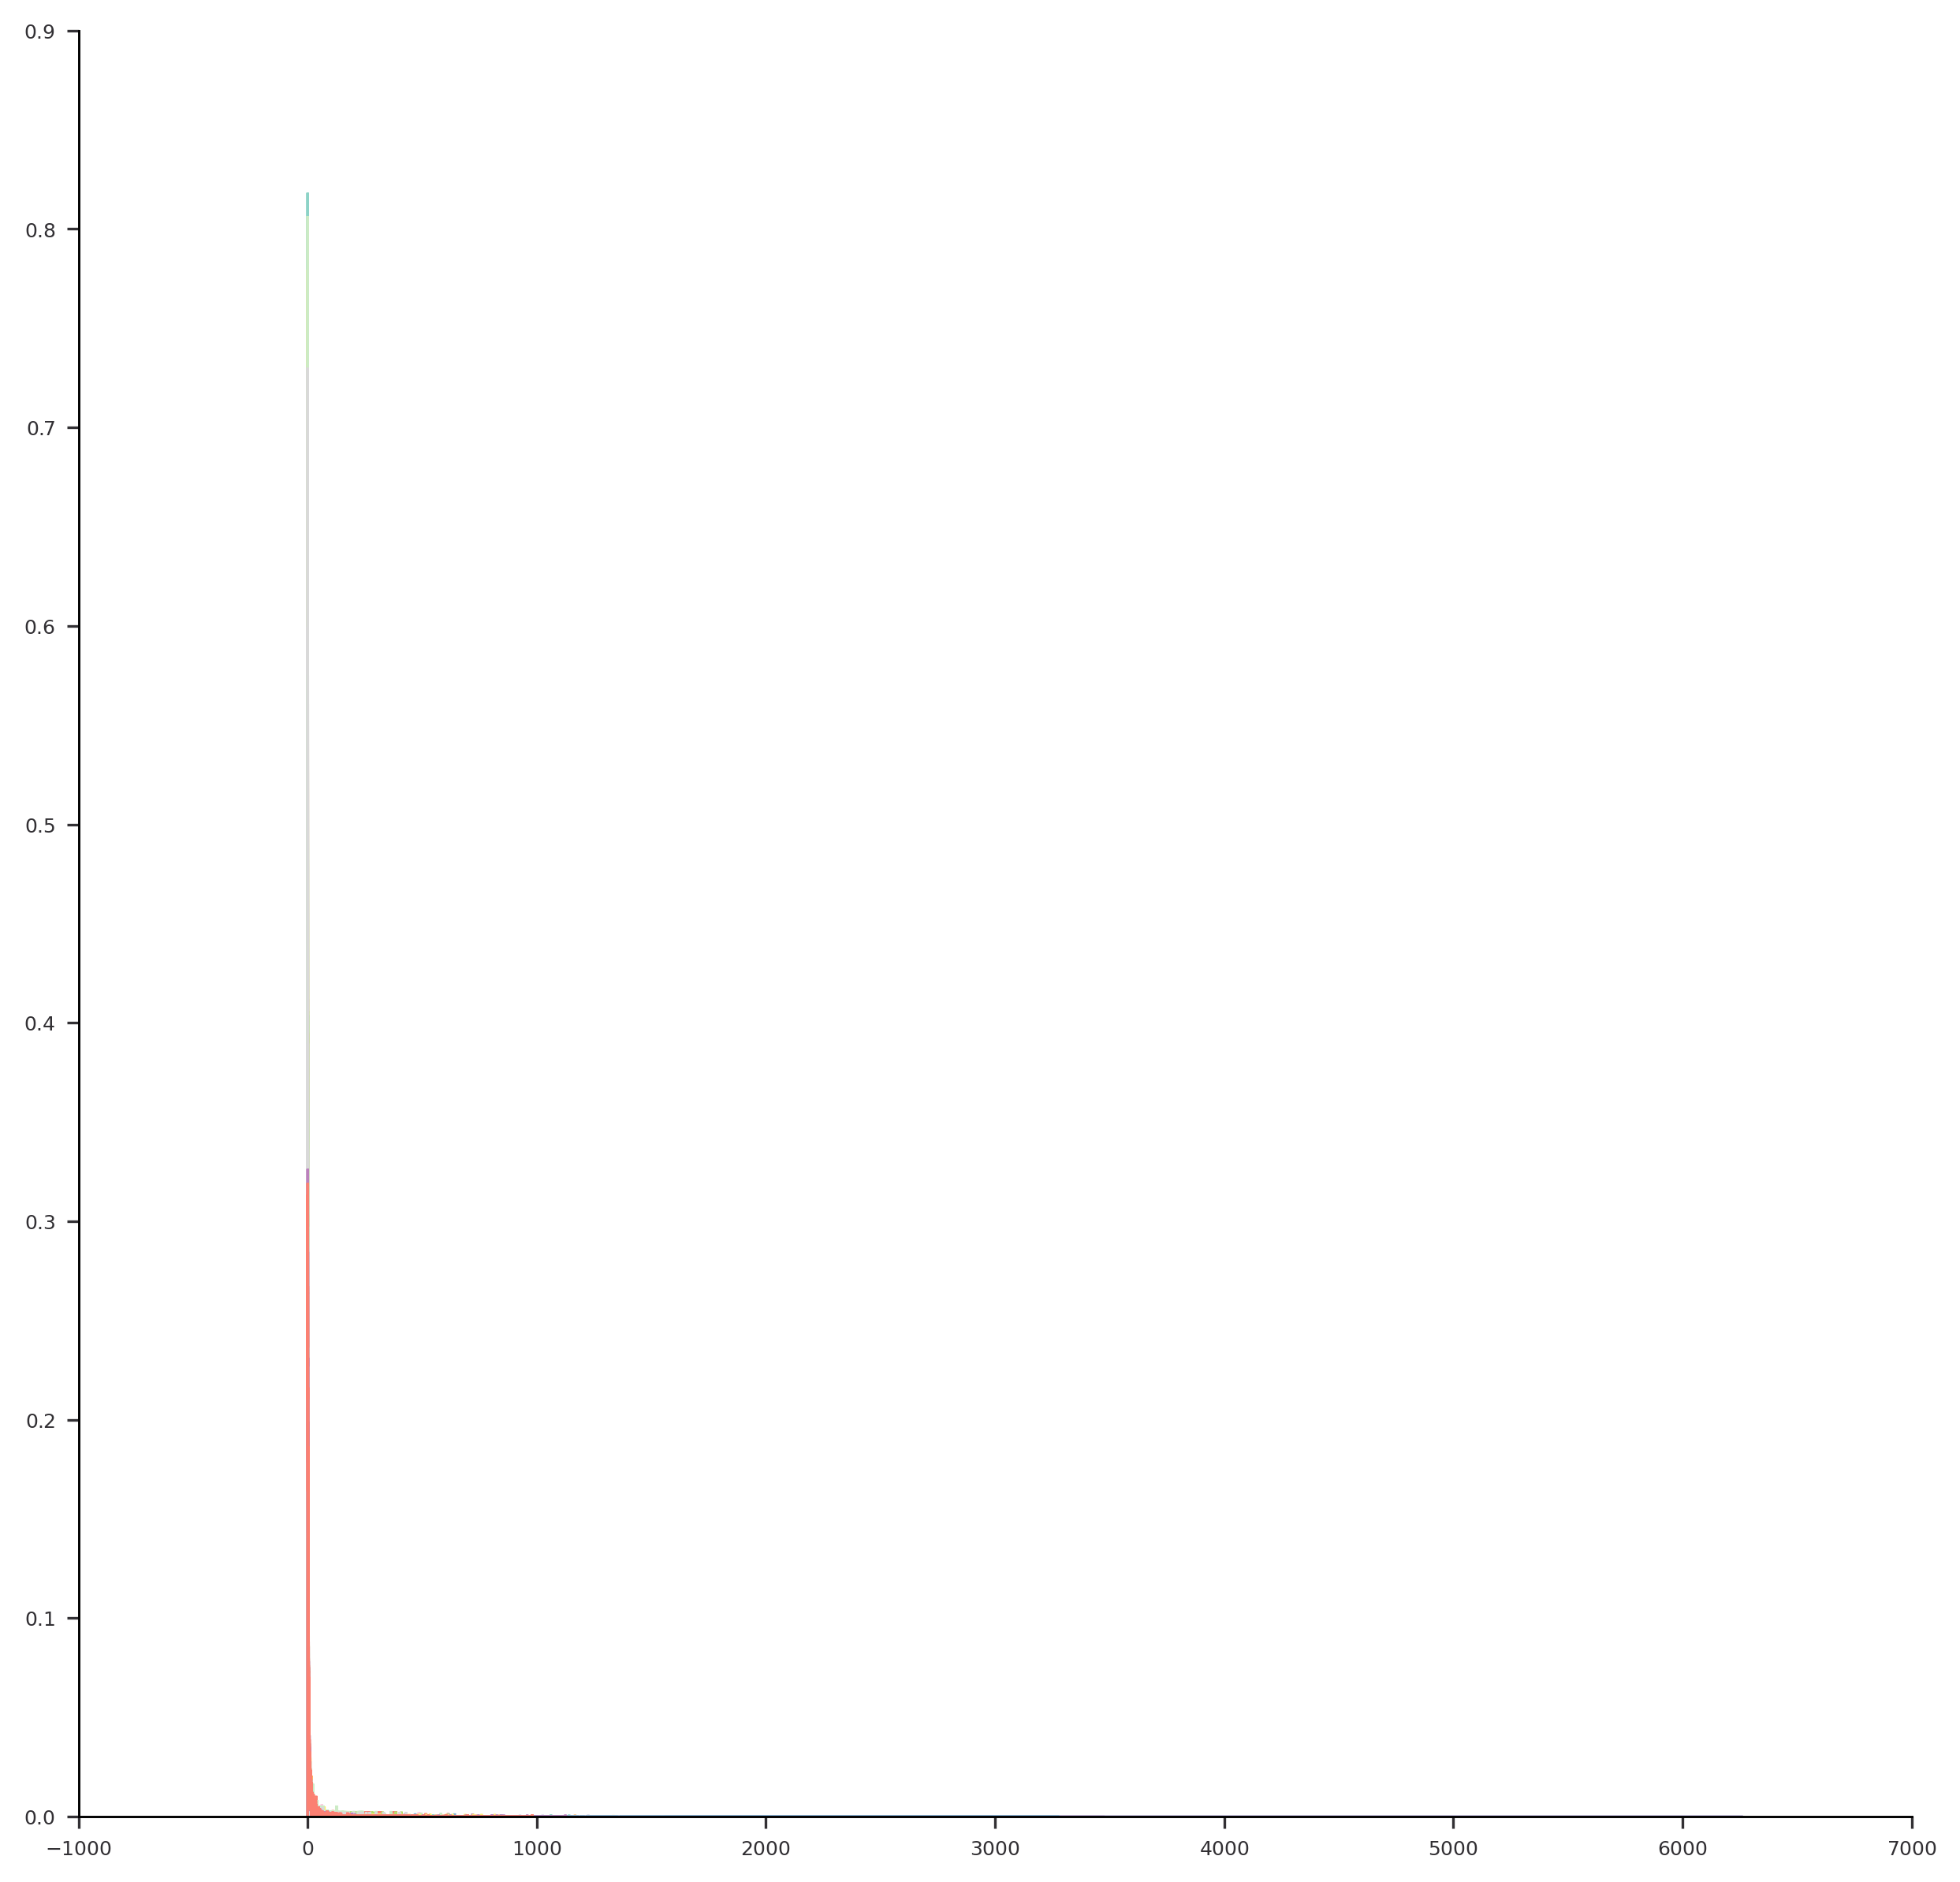

In [30]:
fig, ax = plt.subplots(figsize = (10,10));

x1data = []
x2data = []
y1data = []
y2data = []
for datapoint in presentation_plot_index:

    mu1 = [dvar_pred_iv.iloc[datapoint]['CMR_fine'], dvar_pred_iv.iloc[datapoint]['CMR_coarse']]
    sigma1 = [dvar_pred_iv.iloc[datapoint]['GSD_fine'], dvar_pred_iv.iloc[datapoint]['GSD_coarse']]
    mu2 = [dvar_test.iloc[datapoint]['CMR_fine'], dvar_test.iloc[datapoint]['CMR_coarse']]
    sigma2 = [dvar_test.iloc[datapoint]['GSD_fine'], dvar_test.iloc[datapoint]['GSD_coarse']]
    Vtot1 = dvar_pred_iv.iloc[datapoint]['V_tot']
    Vtot2 = dvar_test.iloc[datapoint]['V_tot']
    
    s1 = np.random.lognormal(mu1[0], sigma1[0], 100000)
    s2 = np.random.lognormal(mu2[0], sigma2[0], 100000)
    s11 = np.random.lognormal(mu1[1], sigma1[1], 100000)
    s21 = np.random.lognormal(mu2[1], sigma2[1], 100000)

    count1, bins1, ignored1 = plt.hist(s1, 100000, density=True, align='mid', histtype = 'step')
    count2, bins2, ignored2 = plt.hist(s2, 100000, density=True, align='mid', histtype = 'step')

    count11, bins11, ignored11 = plt.hist(s11, 100000, density=True, align='mid', histtype = 'step')
    count21, bins21, ignored21 = plt.hist(s21, 100000, density=True, align='mid', histtype = 'step')

       
    
    
    x1_n = np.linspace(min(bins1), max(bins11),1000000)
    x2_n = np.linspace(min(bins2), max(bins21),1000000)
    
    pdf1 = [(Vtot1 / (np.sqrt(2 * np.pi) * np.log(sigma1[0]))) * np.exp((-np.square((np.log(x1_n) - np.log(mu1[0])))) / (2 * np.square(np.log(sigma1[0])))) +
             (Vtot1 / (np.sqrt(2 * np.pi) * np.log(sigma1[1]))) * np.exp((-np.square((np.log(x1_n) - np.log(mu1[1])))) / (2 * np.square(np.log(sigma1[1]))))]
    
            
    pdf2 = [(Vtot2 / (np.sqrt(2 * np.pi) * np.log(sigma2[0]))) * np.exp((-np.square((np.log(x2_n) - np.log(mu2[0])))) / (2 * np.square(np.log(sigma2[0])))) +
             (Vtot2 / (np.sqrt(2 * np.pi) * np.log(sigma2[1]))) * np.exp((-np.square((np.log(x2_n) - np.log(mu2[1])))) / (2 * np.square(np.log(sigma2[1]))))]
    

    
    x1data.append(x1_n)
    x2data.append(x2_n)
    y1data.append(pdf1)
    y2data.append(pdf2)

6022
1000
4000
11000
4821
18027


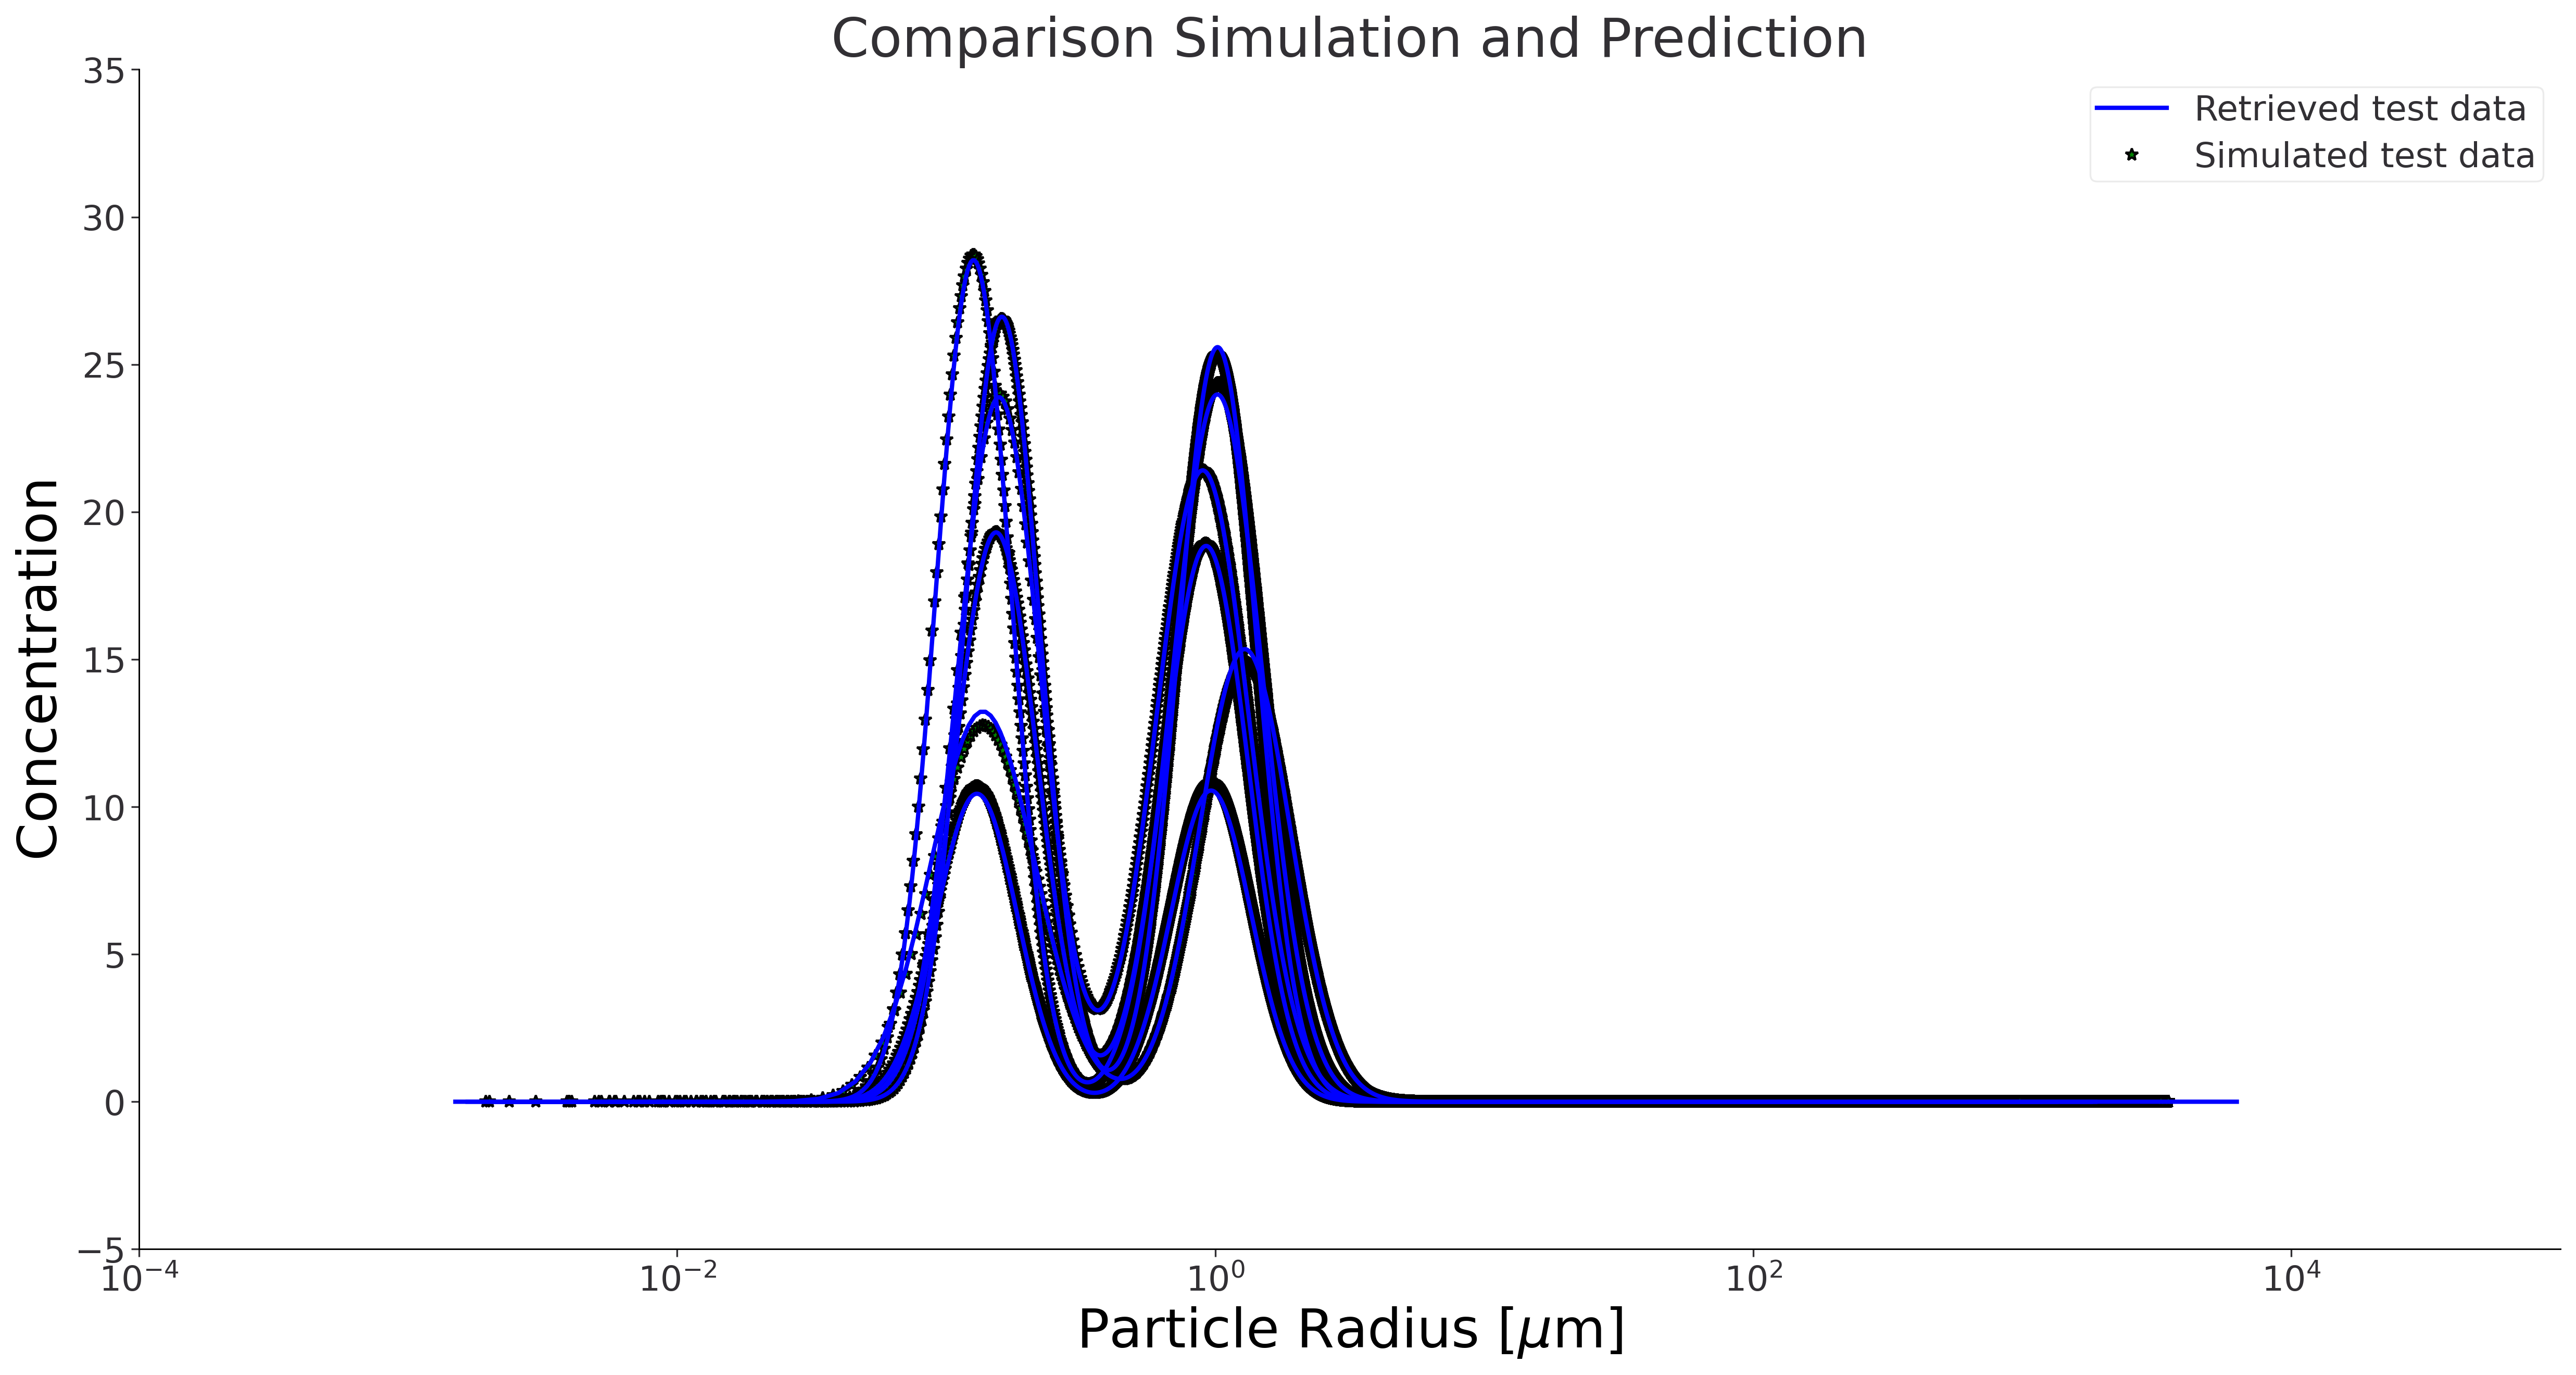

In [31]:
fig, ax = plt.subplots(figsize = (20,10))
for datalen in (0,1,2,3,4,5):
    print(presentation_plot_index[datalen])
     
    if datalen == 0:        
        ax.plot(x1data[datalen], y1data[datalen][0],'b', linewidth=2,label ='Retrieved test data', zorder = 5)
        ax.plot(x2data[datalen], y2data[datalen][0], '*g',linewidth=1, label = 'Simulated test data', zorder = 0)
    else:
        ax.plot(x1data[datalen], y1data[datalen][0],'b', linewidth=2 , zorder = 5)#,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen][0], '*g',linewidth=1, zorder = 0)#, label = 'Simulated test data')
        
    
ax.legend(['Predicted test data', 'test data'], fontsize = 16)
ax.legend(fontsize = 16)   

ax.set_xlabel('Particle Radius [$\mu$m]',fontsize = 25)
ax.set_ylabel('Concentration ',fontsize = 25)
ax.tick_params(labelsize = 16)    
ax.set_title( 'Comparison Simulation and Prediction',fontsize = 25)
fig.align_labels()

plt.xscale('log')

In [32]:
color1 = ['gold','orange','orangered','red','firebrick','darkred']

color2 = ['skyblue','dodgerblue','royalblue', 'blue', 'darkblue','midnightblue']

fontsize1 = 20
fontsize2 = 16

In [34]:
color1 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red','tab:purple', 'tab:cyan']
colorg = 'tab:gray'

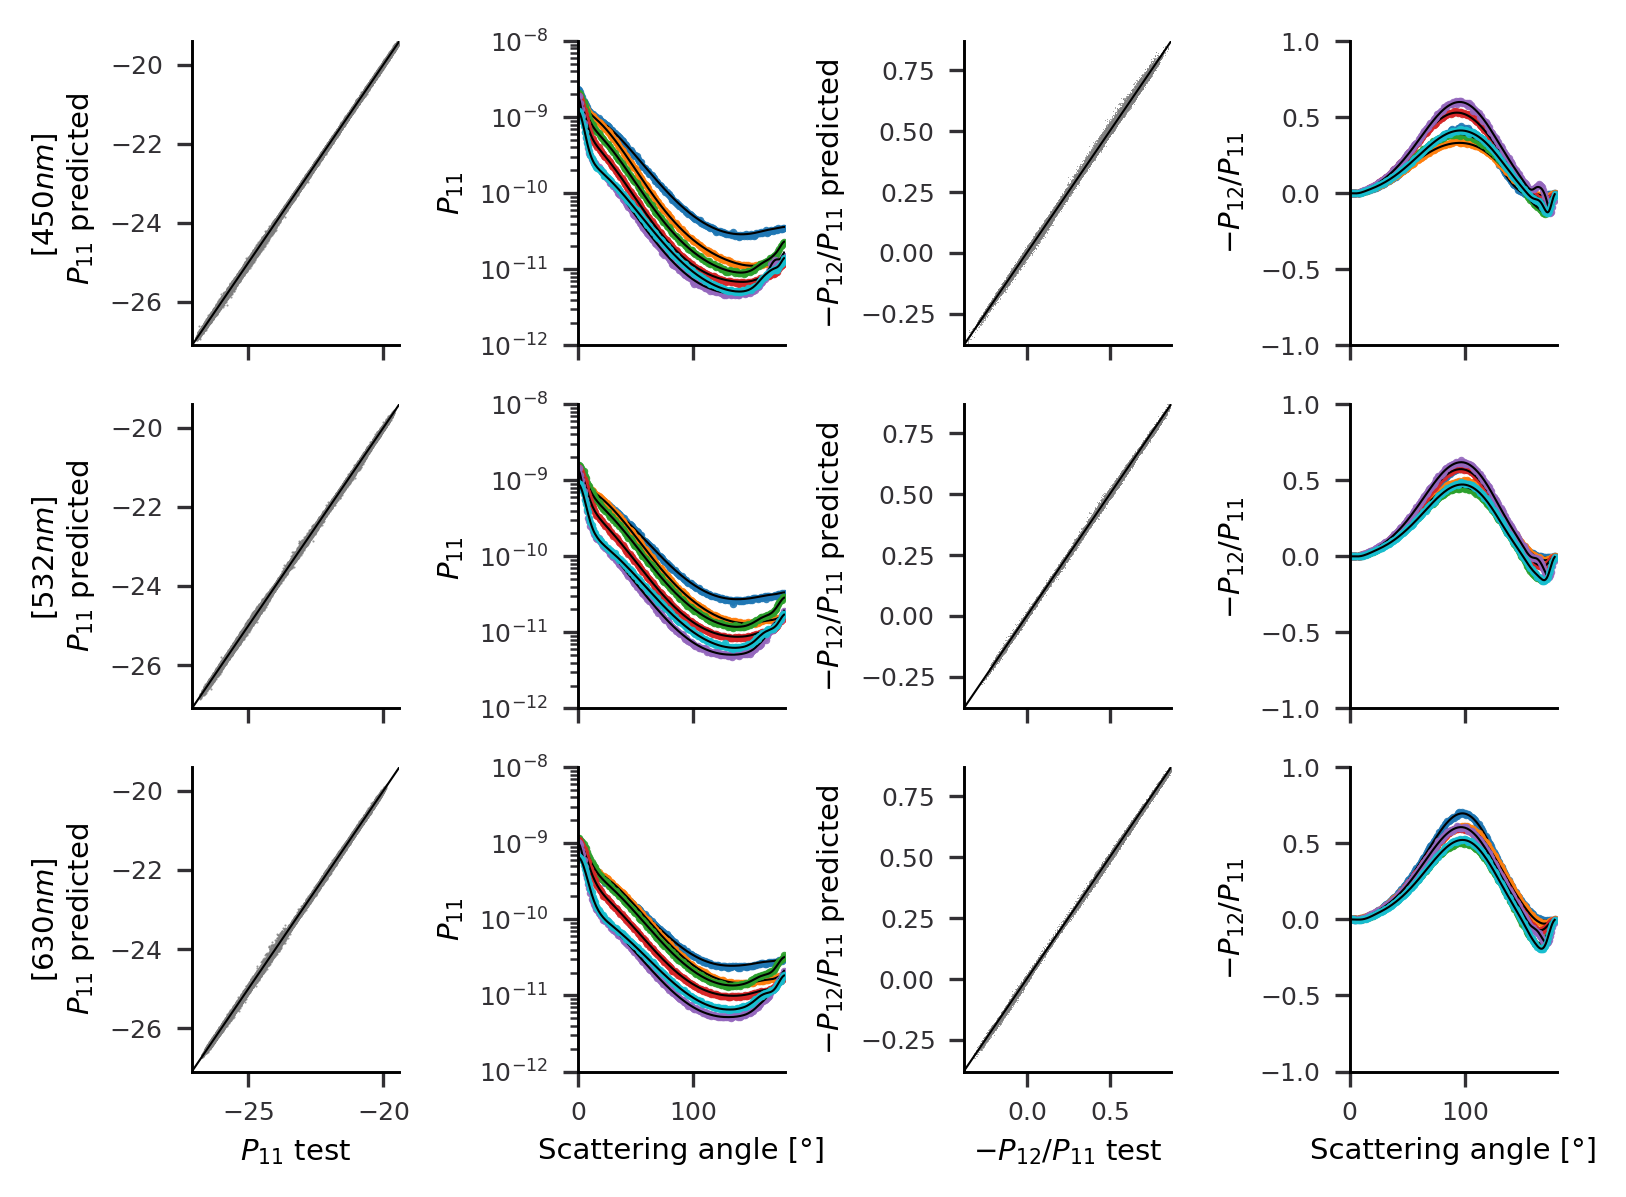

In [35]:
#fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(3, 3, figsize =(14,14))
#fig,ax = plt.subplots(3, 3, figsize =(14,14))
fig = plt.figure(figsize=(5.3,4))

ax1 = fig.add_subplot(3,4,1)
#ax1 = plt.subplot(3,3,1)

ax2 = fig.add_subplot(3,4,2)
ax3 = fig.add_subplot(3,4,3)
ax4 = fig.add_subplot(3,4,4)
ax5 = fig.add_subplot(3,4,5,sharex=ax1)
ax6 = fig.add_subplot(3,4,6,sharex=ax2)
ax7 = fig.add_subplot(3,4,7,sharex=ax3)
ax8 = fig.add_subplot(3,4,8,sharex=ax4)
ax9 = fig.add_subplot(3,4,9,sharex=ax1)
ax10 = fig.add_subplot(3,4,10,sharex=ax2)
ax11 = fig.add_subplot(3,4,11,sharex=ax3)
ax12 = fig.add_subplot(3,4,12,sharex=ax4)
i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)

    
    
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)

    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)

    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_test[wl_P12_450])).iloc[index],**test_marker532)
      
    
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_test[wl_P12_532])).iloc[index],**test_marker532)

    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_test[wl_P12_630])).iloc[index],**test_marker532)


    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$P_{11}$')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11}$ ')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11}$')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylim(-1,1)
ax4.set_ylabel('$-P_{12}/P_{11}$')
ax8.set_ylabel('$-P_{12}/P_{11}$ ')
ax8.set_xlim(0, 180)
ax8.set_ylim(-1,1)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$')
ax12.set_xlim(0, 180)    
ax12.set_ylim(-1,1)


ax1.plot(qoi_test[wl_P11_450],qoi_pred_fw[wl_P11_450],'o', markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha  =0.8)

ax5.plot(qoi_test[wl_P11_532],qoi_pred_fw[wl_P11_532],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)
ax9.plot(qoi_test[wl_P11_630],qoi_pred_fw[wl_P11_630],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)

ax1.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax1.set_xlim(-27.1,-19.4)
ax1.set_ylim(-27.1,-19.4)
ax5.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax5.set_xlim(-27.1,-19.4)
ax5.set_ylim(-27.1,-19.4)
ax9.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax9.set_xlim(-27.1,-19.4)
ax9.set_ylim(-27.1,-19.4)

ax3.plot(qoi_test[wl_P12_450],qoi_pred_fw[wl_P12_450],".",markerfacecolor=colorg,markeredgecolor=None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax7.plot(qoi_test[wl_P12_532],qoi_pred_fw[wl_P12_532],".",markerfacecolor=colorg,markeredgecolor= None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax11.plot(qoi_test[wl_P12_630],qoi_pred_fw[wl_P12_630],".",markerfacecolor=colorg,markeredgecolor=None,markersize =0.5,markeredgewidth=0,alpha = 0.8)

ax3.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax3.set_xlim(-0.38,0.87)
ax3.set_ylim(-0.38,0.87)
ax7.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax7.set_xlim(-0.38,0.87)
ax7.set_ylim(-0.38,0.87)
ax11.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax11.set_xlim(-0.38,0.87)
ax11.set_ylim(-0.38,0.87)

ax1.set_ylabel('$[450 nm]$' ' \n' ' $P_{11}$ predicted')
ax3.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax5.set_ylabel('$[532 nm]$' ' \n' '$P_{11}$ predicted')
ax7.set_ylabel('$-P_{12}/P_{11}$ predicted')

ax9.set_ylabel('$[630 nm]$' '\n' '$P_{11}$ predicted')
ax11.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax9.set_xlabel('$P_{11}$ test')
ax11.set_xlabel('$-P_{12}/P_{11}$ test')


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)


fig.tight_layout() 
fig.savefig(f'{plot_dir}/Test_Pred_bim.jpg')








In [36]:
from matplotlib.gridspec import GridSpec
import matplotlib.ticker

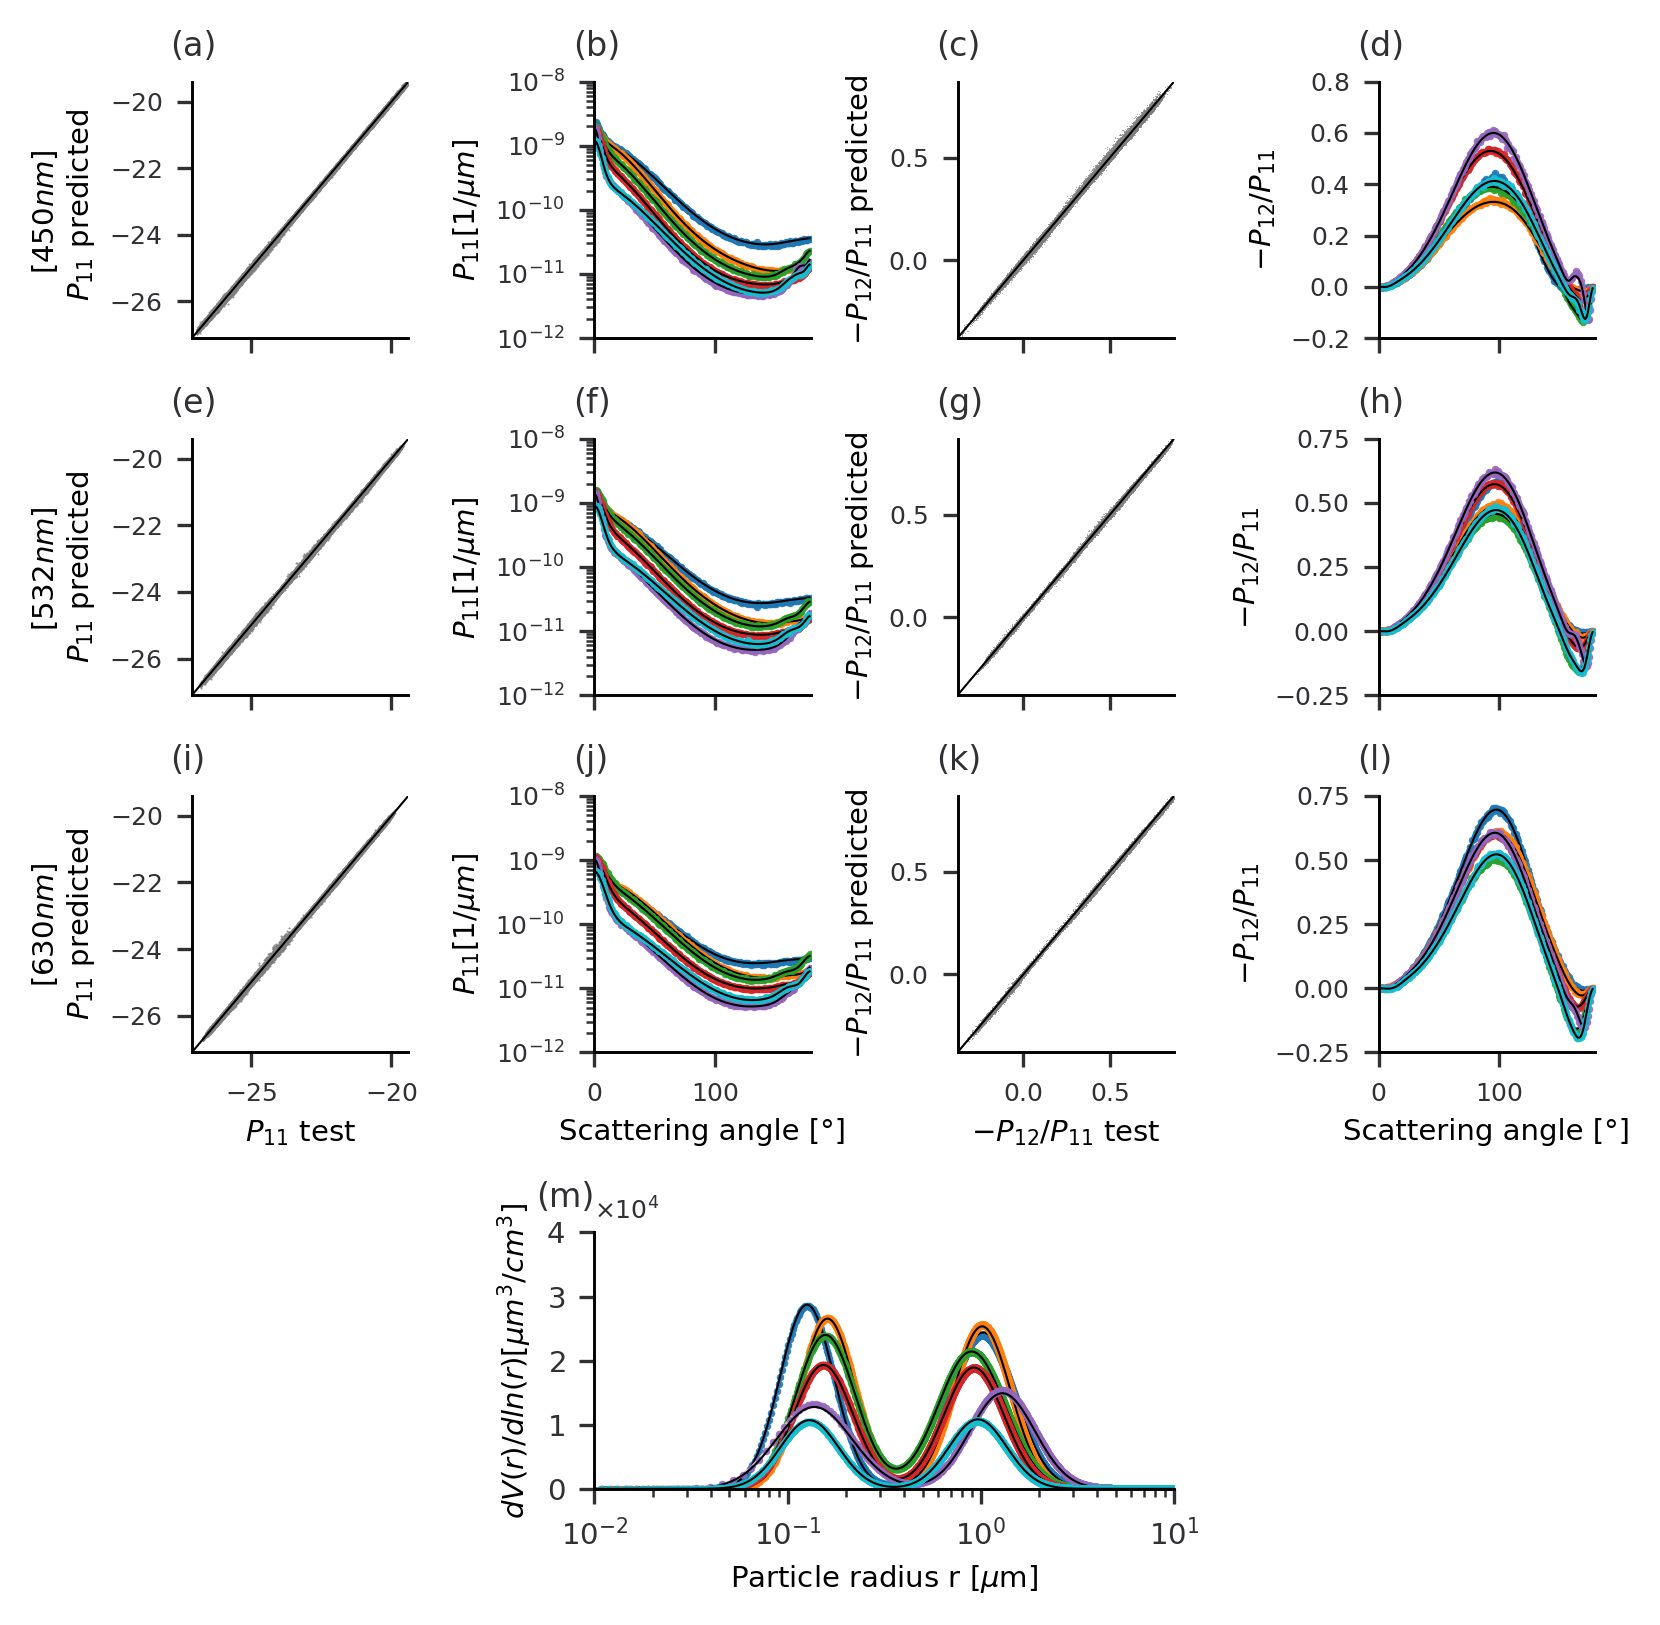

In [39]:
#fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(3, 3, figsize =(14,14))
#fig,ax = plt.subplots(3, 3, figsize =(14,14))
#fig = plt.figure(figsize=(5.3,4))
fig = plt.figure(figsize=(5.3,5.3),constrained_layout=True)

gs = GridSpec(4, 4, figure=fig)


ax1 = fig.add_subplot(gs[0, 0])

ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0],sharex=ax1)
ax6 = fig.add_subplot(gs[1, 1],sharex=ax2)
ax7 = fig.add_subplot(gs[1, 2],sharex=ax3)
ax8 = fig.add_subplot(gs[1, 3],sharex=ax4)
ax9 = fig.add_subplot(gs[2, 0],sharex=ax1)
ax10 = fig.add_subplot(gs[2, 1],sharex=ax2)
ax11 = fig.add_subplot(gs[2, 2],sharex=ax3)
ax12 = fig.add_subplot(gs[2, 3],sharex=ax4)
ax13 = fig.add_subplot(gs[3,1:3])

ax1.text(-0.1, 1.1,'(a)' , transform=ax1.transAxes, size=sizel)
ax2.text(-0.1, 1.1,'(b)' , transform=ax2.transAxes, size=sizel)
ax3.text(-0.1, 1.1,'(c)' , transform=ax3.transAxes, size=sizel)
ax4.text(-0.1, 1.1,'(d)' , transform=ax4.transAxes, size=sizel)
ax5.text(-0.1, 1.1,'(e)' , transform=ax5.transAxes, size=sizel)
ax6.text(-0.1, 1.1,'(f)' , transform=ax6.transAxes, size=sizel)
ax7.text(-0.1, 1.1,'(g)' , transform=ax7.transAxes, size=sizel)
ax8.text(-0.1, 1.1,'(h)' , transform=ax8.transAxes, size=sizel)
ax9.text(-0.1, 1.1,'(i)' , transform=ax9.transAxes, size=sizel)
ax10.text(-0.1, 1.1,'(j)' , transform=ax10.transAxes, size=sizel)
ax11.text(-0.1, 1.1,'(k)' , transform=ax11.transAxes, size=sizel)
ax12.text(-0.1, 1.1,'(l)' , transform=ax12.transAxes, size=sizel)
ax13.text(-0.1, 1.1,'(m)' , transform=ax13.transAxes, size=sizel)




i = 0
for index in presentation_plot_index:
    
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_450])).iloc[index],**pred_marker532)
    ax2.plot(np.arange(0,len(qoi_test[wl_P11_450].iloc[index])),(np.exp(qoi_test[wl_P11_450])).iloc[index],**test_marker532)

    
    
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_532])).iloc[index],**pred_marker532)
    ax6.plot(np.arange(0,len(qoi_test[wl_P11_532].iloc[index])),(np.exp(qoi_test[wl_P11_532])).iloc[index],**test_marker532)

    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_pred_fw[wl_P11_630])).iloc[index],**pred_marker532)
    ax10.plot(np.arange(0,len(qoi_test[wl_P11_630].iloc[index])),(np.exp(qoi_test[wl_P11_630])).iloc[index],**test_marker532)

    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_pred_fw[wl_P12_450])).iloc[index],**pred_marker532)
    ax4.plot(np.arange(0,len(qoi_test[wl_P12_450].iloc[index])),((qoi_test[wl_P12_450])).iloc[index],**test_marker532)
      
    
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_pred_fw[wl_P12_532])).iloc[index],**pred_marker532)
    ax8.plot(np.arange(0,len(qoi_test[wl_P12_532].iloc[index])),((qoi_test[wl_P12_532])).iloc[index],**test_marker532)

    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_pred_fw[wl_P12_630])).iloc[index],**pred_marker532)
    ax12.plot(np.arange(0,len(qoi_test[wl_P12_630].iloc[index])),((qoi_test[wl_P12_630])).iloc[index],**test_marker532)


    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax6.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax8.get_xticklabels(), visible=False)
    i = i+1

ax2.set_ylabel('$ P_{11} [1 / \mu m]$')
ax2.set_yscale('log')
ax2.set_xlim(0, 180)
ax6.set_yscale('log')
ax6.set_ylabel('$P_{11} [1 / \mu m]$ ')
ax6.set_xlim(0, 180)
ax10.set_yscale('log')
ax10.set_xlabel('Scattering angle [°]')
ax10.set_ylabel('$P_{11} [1 / \mu m]$')
ax10.set_xlim(0, 180)
ax4.set_xlim(0, 180)
ax4.set_ylabel('$-P_{12}/P_{11}$')
ax8.set_ylabel('$-P_{12}/P_{11}$ ')
ax8.set_xlim(0, 180)
ax12.set_xlabel('Scattering angle [°]')
ax12.set_ylabel('$-P_{12}/P_{11}$')
ax12.set_xlim(0, 180)    


ax1.plot(qoi_test[wl_P11_450],qoi_pred_fw[wl_P11_450],'o', markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha  =0.8)

ax5.plot(qoi_test[wl_P11_532],qoi_pred_fw[wl_P11_532],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)
ax9.plot(qoi_test[wl_P11_630],qoi_pred_fw[wl_P11_630],'o',markersize = 0.5,markerfacecolor = colorg,markeredgecolor= None,markeredgewidth=0,alpha = 0.8)

ax1.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax1.set_xlim(-27.1,-19.4)
ax1.set_ylim(-27.1,-19.4)
ax5.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax5.set_xlim(-27.1,-19.4)
ax5.set_ylim(-27.1,-19.4)
ax9.axline([-20, -20], [-10, -10],color = 'black', linewidth = 0.5)
ax9.set_xlim(-27.1,-19.4)
ax9.set_ylim(-27.1,-19.4)

ax3.plot(qoi_test[wl_P12_450],qoi_pred_fw[wl_P12_450],".",markerfacecolor=colorg,markeredgecolor=None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax7.plot(qoi_test[wl_P12_532],qoi_pred_fw[wl_P12_532],".",markerfacecolor=colorg,markeredgecolor= None,markersize = 0.5,markeredgewidth=0,alpha = 0.8)
ax11.plot(qoi_test[wl_P12_630],qoi_pred_fw[wl_P12_630],".",markerfacecolor=colorg,markeredgecolor=None,markersize =0.5,markeredgewidth=0,alpha = 0.8)

ax3.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax3.set_xlim(-0.38,0.87)
ax3.set_ylim(-0.38,0.87)
ax7.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax7.set_xlim(-0.38,0.87)
ax7.set_ylim(-0.38,0.87)
ax11.axline([-0.5, -0.5], [0.5, 0.5],color = 'black', linewidth = 0.5)
ax11.set_xlim(-0.38,0.87)
ax11.set_ylim(-0.38,0.87)

ax1.set_ylabel('$[450 nm]$' ' \n' ' $P_{11}$ predicted')
ax3.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax5.set_ylabel('$[532 nm]$' ' \n' '$P_{11}$ predicted')
ax7.set_ylabel('$-P_{12}/P_{11}$ predicted')

ax9.set_ylabel('$[630 nm]$' '\n' '$P_{11}$ predicted')
ax11.set_ylabel('$-P_{12}/P_{11}$ predicted')
ax9.set_xlabel('$P_{11}$ test')
ax11.set_xlabel('$-P_{12}/P_{11}$ test')


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)


i=0
for datalen in (0,1,2,3,4,5):
    test_marker532 = {'linewidth':0.5,'color': 'black'}
    pred_marker532 = {'marker':'o','linestyle':None,'markersize':0.8,'markerfacecolor':color1[i], 'markeredgecolor': color1[i],
             'alpha': 0.9}
    
    
    ax13.plot(x1data[datalen], y1data[datalen][0]*1000,**pred_marker532)
    ax13.plot(x2data[datalen], y2data[datalen][0]*1000,**test_marker532)

    i=i+1
    ax13.set_xscale('log')
    ax13.set_xlabel('Particle radius r [$\mu$m]',fontsize = 7)
    ax13.set_ylabel('$dV(r)/d ln(r) [\mu m^3/cm^3] $' ,fontsize = 7)
    ax13.tick_params(labelsize = 7)    
    #ax13.xaxis.set_minor_locator(AutoMinorLocator())
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    ax13.xaxis.set_minor_locator(x_minor)
    ax13.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax13.set_ylim(bottom=0)
    ax13.set_xlim(left= 0.01, right =10 )



fig.savefig(f'{plot_dir}/Test_Pred_bim_V_labels.jpg',bbox_inches='tight')








In [40]:
plot_dir


'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_gaussian_bim_AAE/version1/plots/hyperparameter_scans_paper'

<Figure size 1590x900 with 0 Axes>

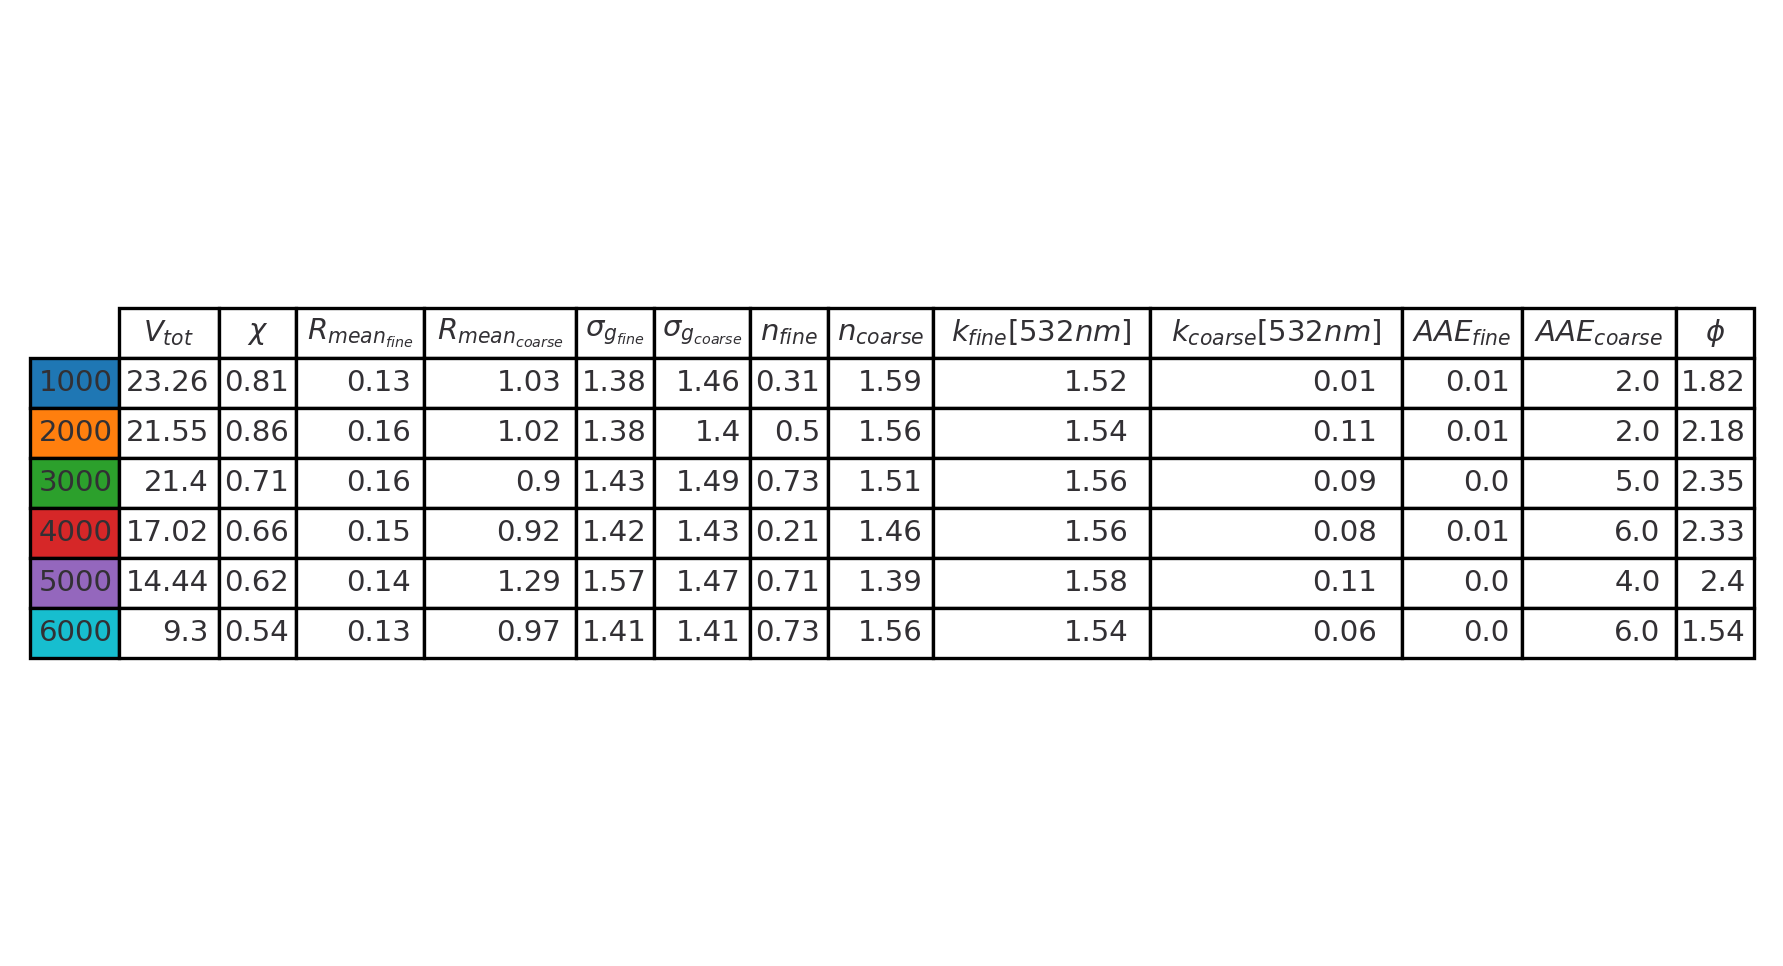

In [41]:
fig = plt.figure(figsize=(5.3,3),constrained_layout=True)
fig, axs = plt.subplots(1,1)

df_new = dvar_test.iloc[presentation_plot_index].round(2)
df_new_columns = ["$V_{tot}$","$\chi$","$R_{mean_{fine}}$","$R_{mean_{coarse}}$","$\sigma_{g_{fine}}$","$\sigma_{g_{coarse}}$","$n_{fine}$","$n_{coarse}$","$k_{fine}[532nm]$","$k_{coarse}[532nm]$","$AAE_{fine}$","$AAE_{coarse}$","$\phi$"]

df_new_index = ['1000','2000','3000','4000','5000','6000']
axs.axis('tight')
axs.axis('off')
the_table = plt.table(cellText=df_new.values,colLabels=df_new_columns,rowLabels=df_new_index,loc="center",rowColours =color1)

the_table.auto_set_font_size(False)
the_table.set_fontsize(7)
the_table.auto_set_column_width(col=list(range(len(df_new_columns))))
fig.savefig(f'{plot_dir}/Test_Pred_bim_V_values.jpg',bbox_inches='tight')



In [35]:
df_new

V_tot   FMF  CMR_fine  CMR_coarse  GSD_fine  GSD_coarse  sph_frac  \
6022   23.26  0.81      0.13        1.03      1.38        1.46      0.31   
1000   21.55  0.86      0.16        1.02      1.38        1.40      0.50   
4000   21.40  0.71      0.16        0.90      1.43        1.49      0.73   
11000  17.02  0.66      0.15        0.92      1.42        1.43      0.21   
4821   14.44  0.62      0.14        1.29      1.57        1.47      0.71   
18027   9.30  0.54      0.13        0.97      1.41        1.41      0.73   

       n_fine  n_coarse  k_fine_532  k_coarse_532  AAE_fine  AAE_coarse  
6022     1.59      1.52        0.01          0.01       2.0        1.82  
1000     1.56      1.54        0.11          0.01       2.0        2.18  
4000     1.51      1.56        0.09          0.00       5.0        2.35  
11000    1.46      1.56        0.08          0.01       6.0        2.33  
4821     1.39      1.58        0.11          0.00       4.0        2.40  
18027    1.56      1.54        0.06          0.00       6.0        1.54

In [36]:
df_new_columns = ["$V_{tot}$","$\chi$","$R_{mean_{fine}}$","$R_{mean_{coarse}}$","$\sigma_{g_{fine}}$","$\sigma_{g_{coarse}}$","$n_{fine}$","n_{coarse}","$k_{fine}[532nm]$","$k_{coarse}[532nm]$","$AAE_{fine}$","$AAE_{coarse}$","$phi$"]






In [37]:
len(y1data[0][0])

1000000

In [38]:
np.min(qoi_pred_fw[wl_P12_450].min())

-0.369854016456449

In [39]:

df_new = dvar_test.iloc[presentation_plot_index]

In [40]:
#df_new['plot_index'] = presentation_plot_index
df_new

V_tot       FMF  CMR_fine  CMR_coarse  GSD_fine  GSD_coarse  \
6022   23.264019  0.814349  0.126002    1.029047  1.381401    1.463235   
1000   21.547789  0.864940  0.160929    1.015561  1.382251    1.403810   
4000   21.398203  0.710220  0.157083    0.895616  1.426894    1.489645   
11000  17.021460  0.655245  0.153177    0.921038  1.421064    1.431503   
4821   14.438855  0.618003  0.137483    1.294150  1.569995    1.471659   
18027   9.300347  0.540639  0.129845    0.966732  1.413991    1.408351   

       sph_frac    n_fine  n_coarse  k_fine_532  k_coarse_532  AAE_fine  \
6022   0.309847  1.593909  1.519253    0.005631      0.011980       2.0   
1000   0.499493  1.561825  1.539935    0.106838      0.012009       2.0   
4000   0.734512  1.513306  1.555953    0.093020      0.004545       5.0   
11000  0.211593  1.462696  1.562066    0.083534      0.005595       6.0   
4821   0.706034  1.387199  1.582589    0.109033      0.000102       4.0   
18027  0.729644  1.563256  1.540910    0.056148      0.002181       6.0   

       AAE_coarse  
6022     1.824452  
1000     2.175852  
4000     2.348071  
11000    2.334947  
4821     2.396440  
18027    1.535805

In [41]:
df_newr = df_new.copy()
df_newr

V_tot       FMF  CMR_fine  CMR_coarse  GSD_fine  GSD_coarse  \
6022   23.264019  0.814349  0.126002    1.029047  1.381401    1.463235   
1000   21.547789  0.864940  0.160929    1.015561  1.382251    1.403810   
4000   21.398203  0.710220  0.157083    0.895616  1.426894    1.489645   
11000  17.021460  0.655245  0.153177    0.921038  1.421064    1.431503   
4821   14.438855  0.618003  0.137483    1.294150  1.569995    1.471659   
18027   9.300347  0.540639  0.129845    0.966732  1.413991    1.408351   

       sph_frac    n_fine  n_coarse  k_fine_532  k_coarse_532  AAE_fine  \
6022   0.309847  1.593909  1.519253    0.005631      0.011980       2.0   
1000   0.499493  1.561825  1.539935    0.106838      0.012009       2.0   
4000   0.734512  1.513306  1.555953    0.093020      0.004545       5.0   
11000  0.211593  1.462696  1.562066    0.083534      0.005595       6.0   
4821   0.706034  1.387199  1.582589    0.109033      0.000102       4.0   
18027  0.729644  1.563256  1.540910    0.056148      0.002181       6.0   

       AAE_coarse  
6022     1.824452  
1000     2.175852  
4000     2.348071  
11000    2.334947  
4821     2.396440  
18027    1.535805

In [42]:
def color_negative_red(value):

    if value in  df_newr.iloc[0].values:
        color = color1[0]
    elif value in  df_newr.iloc[1].values:
        color = color1[1]
    elif value in  df_newr.iloc[2].values:
        color = color1[2]
    elif value in  df_newr.iloc[3].values:
        color = color1[3]
    elif value in  df_newr.iloc[4].values:
        color = color1[4]
    elif value in  df_newr.iloc[5].values:
        color = color1[5]
    else:
        color = 'black'
    return 'background-color: %s' % color

In [43]:
df_newr.iloc[0].values

array([2.32640186e+01, 8.14349131e-01, 1.26001607e-01, 1.02904658e+00,
       1.38140119e+00, 1.46323499e+00, 3.09846917e-01, 1.59390884e+00,
       1.51925289e+00, 5.63063925e-03, 1.19800129e-02, 2.00000000e+00,
       1.82445202e+00])

In [44]:
df_new1 = df_newr[['V_tot','CMR_coarse','CMR_fine']]
df_new2 = df_newr[['GSD_fine','GSD_coarse']]

In [45]:
df_new3 =df_newr[['AAE_fine']]

In [46]:
df_new3.style.applymap(color_negative_red)

ValueError: too many values to unpack (expected 2)

In [47]:
df_new1.style.applymap(color_negative_red)

ValueError: too many values to unpack (expected 2)

In [48]:
df_new2.style.applymap(color_negative_red)

ValueError: too many values to unpack (expected 2)

In [49]:
df_newr.style.applymap(color_negative_red)

ValueError: too many values to unpack (expected 2)

In [50]:
dvar_test.iloc[[18027,6022,4821,1000,4000,11000]]

V_tot       FMF  CMR_fine  CMR_coarse  GSD_fine  GSD_coarse  \
18027   9.300347  0.540639  0.129845    0.966732  1.413991    1.408351   
6022   23.264019  0.814349  0.126002    1.029047  1.381401    1.463235   
4821   14.438855  0.618003  0.137483    1.294150  1.569995    1.471659   
1000   21.547789  0.864940  0.160929    1.015561  1.382251    1.403810   
4000   21.398203  0.710220  0.157083    0.895616  1.426894    1.489645   
11000  17.021460  0.655245  0.153177    0.921038  1.421064    1.431503   

       sph_frac    n_fine  n_coarse  k_fine_532  k_coarse_532  AAE_fine  \
18027  0.729644  1.563256  1.540910    0.056148      0.002181       6.0   
6022   0.309847  1.593909  1.519253    0.005631      0.011980       2.0   
4821   0.706034  1.387199  1.582589    0.109033      0.000102       4.0   
1000   0.499493  1.561825  1.539935    0.106838      0.012009       2.0   
4000   0.734512  1.513306  1.555953    0.093020      0.004545       5.0   
11000  0.211593  1.462696  1.562066    0.083534      0.005595       6.0   

       AAE_coarse  
18027    1.535805  
6022     1.824452  
4821     2.396440  
1000     2.175852  
4000     2.348071  
11000    2.334947

In [51]:
dvar_test.describe()

V_tot           FMF      CMR_fine    CMR_coarse      GSD_fine  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      16.635096      0.729554      0.144554      1.085005      1.474780   
std        4.239037      0.115521      0.010735      0.124044      0.055215   
min        9.300347      0.530029      0.126002      0.870005      1.380006   
25%       12.937745      0.629053      0.135237      0.977317      1.426195   
50%       16.650658      0.728802      0.144545      1.084572      1.474913   
75%       20.315099      0.829788      0.153893      1.192971      1.522855   
max       23.998158      0.929993      0.163000      1.300000      1.569995   

         GSD_coarse      sph_frac        n_fine      n_coarse    k_fine_532  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       1.445068      0.509870      1.464477      1.524889      0.063146   
std        0.026042      0.196183      0.078214      0.043264      0.042327   
min        1.400000      0.170003      1.330003      1.450007      0.000005   
25%        1.422366      0.338853      1.396455      1.487415      0.028816   
50%        1.445446      0.509943      1.464372      1.525143      0.058185   
75%        1.467576      0.681712      1.532542      1.562128      0.090140   
max        1.489991      0.849939      1.599982      1.600000      0.199955   

       k_coarse_532      AAE_fine    AAE_coarse  
count  20000.000000  20000.000000  20000.000000  
mean       0.008565      4.012450      1.947780  
std        0.004940      1.778835      0.259915  
min        0.000009      1.000000      1.500007  
25%        0.004308      3.000000      1.722132  
50%        0.008489      4.000000      1.945167  
75%        0.012810      6.000000      2.171836  
max        0.018295      7.000000      2.399993

In [52]:
dvar_test['V_tot'].argmin()

18027

In [53]:
dvar_test['CMR_fine'].argmin()

6022

In [54]:
dvar_test['GSD_fine'].argmax()

4821

In [55]:
dvar_test

V_tot       FMF  CMR_fine  CMR_coarse  GSD_fine  GSD_coarse  \
0       9.722911  0.845728  0.130066    1.123332  1.420850    1.487589   
1      23.003213  0.854241  0.157977    1.037686  1.485561    1.434949   
2      13.200783  0.889476  0.140440    1.201885  1.534167    1.455457   
3      20.455700  0.665190  0.145012    1.272089  1.514938    1.413690   
4      22.523999  0.710390  0.151952    1.297953  1.493747    1.486553   
...          ...       ...       ...         ...       ...         ...   
19995  23.310734  0.878549  0.130477    0.993841  1.532007    1.475255   
19996  18.564973  0.746804  0.148863    1.138562  1.471771    1.446150   
19997  12.082657  0.865969  0.127825    1.149722  1.567017    1.412949   
19998  17.560679  0.906785  0.158628    1.213001  1.455003    1.443433   
19999  20.155443  0.653789  0.132495    0.948064  1.385637    1.475193   

       sph_frac    n_fine  n_coarse  k_fine_532  k_coarse_532  AAE_fine  \
0      0.273533  1.480761  1.552695    0.058397      0.005880       2.0   
1      0.511391  1.575458  1.497135    0.057269      0.014687       5.0   
2      0.841200  1.391997  1.496126    0.092570      0.008067       4.0   
3      0.444475  1.487489  1.465119    0.027702      0.001546       4.0   
4      0.236284  1.588219  1.528239    0.085664      0.010191       6.0   
...         ...       ...       ...         ...           ...       ...   
19995  0.793718  1.482469  1.484318    0.008467      0.015698       1.0   
19996  0.757960  1.574798  1.587827    0.081343      0.006950       2.0   
19997  0.522884  1.436615  1.517872    0.126130      0.010458       3.0   
19998  0.504179  1.435685  1.523314    0.077233      0.011144       6.0   
19999  0.503152  1.485760  1.523242    0.081208      0.002117       4.0   

       AAE_coarse  
0        1.998888  
1        2.064280  
2        2.101505  
3        1.907585  
4        1.564874  
...           ...  
19995    2.009870  
19996    1.923021  
19997    2.172167  
19998    2.363325  
19999    2.383631  

[20000 rows x 13 columns]

In [56]:
dvar_pred_iv

V_tot       FMF  CMR_fine  CMR_coarse  GSD_fine  GSD_coarse  \
0       9.667211  0.841703  0.129999    1.116107  1.423556    1.484195   
1      22.955789  0.857369  0.158007    1.040464  1.486147    1.434202   
2      13.125341  0.887678  0.140671    1.200295  1.533894    1.450145   
3      20.194853  0.669362  0.144957    1.278827  1.515376    1.412831   
4      22.502552  0.709014  0.151665    1.294453  1.495746    1.481031   
...          ...       ...       ...         ...       ...         ...   
19995  23.328644  0.883559  0.130901    0.993194  1.527815    1.471466   
19996  18.606826  0.748448  0.148768    1.139169  1.473712    1.446288   
19997  12.027643  0.863811  0.127983    1.148211  1.565782    1.407740   
19998  17.621081  0.910291  0.158500    1.213685  1.458338    1.441099   
19999  19.986577  0.654527  0.132459    0.946417  1.385314    1.475316   

       sph_frac    n_fine  n_coarse  k_fine_532  k_coarse_532  AAE_fine  \
0      0.274848  1.484196  1.554921    0.061570      0.006051  1.985351   
1      0.514501  1.577610  1.498064    0.057548      0.014358  5.006289   
2      0.832174  1.394555  1.497904    0.091557      0.008143  3.991412   
3      0.453782  1.488358  1.464054    0.029795      0.001872  3.930540   
4      0.241216  1.590517  1.527789    0.087593      0.010241  5.955139   
...         ...       ...       ...         ...           ...       ...   
19995  0.791833  1.479380  1.484914    0.006210      0.015888  1.718463   
19996  0.751692  1.579335  1.587753    0.080768      0.006837  2.060592   
19997  0.518026  1.439192  1.519665    0.129431      0.010484  2.970838   
19998  0.501080  1.437635  1.525396    0.077790      0.011131  5.961131   
19999  0.496981  1.486171  1.521451    0.078315      0.002048  4.037516   

       AAE_coarse  
0        1.940729  
1        2.117295  
2        2.055968  
3        1.905940  
4        1.636176  
...           ...  
19995    1.987319  
19996    1.984629  
19997    2.128043  
19998    2.323874  
19999    2.359490  

[20000 rows x 13 columns]

In [57]:
abs_error = np.abs(dvar_test-dvar_pred_iv)
abs_error

V_tot       FMF  CMR_fine  CMR_coarse  GSD_fine  GSD_coarse  \
0      0.055700  0.004025  0.000068    0.007224  0.002707    0.003393   
1      0.047423  0.003128  0.000030    0.002778  0.000586    0.000747   
2      0.075442  0.001798  0.000231    0.001590  0.000274    0.005312   
3      0.260846  0.004172  0.000056    0.006738  0.000438    0.000859   
4      0.021447  0.001376  0.000288    0.003500  0.001999    0.005522   
...         ...       ...       ...         ...       ...         ...   
19995  0.017910  0.005009  0.000424    0.000647  0.004192    0.003789   
19996  0.041852  0.001644  0.000095    0.000607  0.001941    0.000137   
19997  0.055014  0.002158  0.000158    0.001511  0.001236    0.005209   
19998  0.060402  0.003506  0.000128    0.000684  0.003336    0.002334   
19999  0.168866  0.000738  0.000036    0.001647  0.000323    0.000123   

       sph_frac    n_fine  n_coarse  k_fine_532  k_coarse_532  AAE_fine  \
0      0.001315  0.003436  0.002226    0.003173      0.000172  0.014649   
1      0.003111  0.002152  0.000929    0.000279      0.000329  0.006289   
2      0.009026  0.002558  0.001779    0.001013      0.000076  0.008588   
3      0.009307  0.000869  0.001065    0.002093      0.000326  0.069460   
4      0.004932  0.002298  0.000451    0.001929      0.000051  0.044861   
...         ...       ...       ...         ...           ...       ...   
19995  0.001885  0.003090  0.000596    0.002257      0.000189  0.718463   
19996  0.006268  0.004536  0.000074    0.000575      0.000113  0.060592   
19997  0.004859  0.002577  0.001792    0.003301      0.000026  0.029162   
19998  0.003098  0.001950  0.002081    0.000558      0.000014  0.038869   
19999  0.006171  0.000412  0.001791    0.002893      0.000070  0.037516   

       AAE_coarse  
0        0.058159  
1        0.053015  
2        0.045537  
3        0.001645  
4        0.071301  
...           ...  
19995    0.022552  
19996    0.061608  
19997    0.044124  
19998    0.039451  
19999    0.024141  

[20000 rows x 13 columns]

In [58]:
abs_error.mean(axis = 0)

V_tot           0.115453
FMF             0.002325
CMR_fine        0.000183
CMR_coarse      0.003075
GSD_fine        0.001831
GSD_coarse      0.002124
sph_frac        0.005655
n_fine          0.001823
n_coarse        0.001221
k_fine_532      0.001338
k_coarse_532    0.000264
AAE_fine        0.135188
AAE_coarse      0.067792
dtype: float64